In [93]:
import pandas as pd
import matplotlib.pyplot as plt

In [94]:
# df = pd.read_csv("data/final_data_one_hot.csv")
# df.head(3)

In [95]:
df = pd.read_csv("data/final_data_min_lists.csv")
df.head(5)

,runtime,audience_rating,G,NC17,NR,PG,PG-13,R,Action & Adventure,Animation,...,Science Fiction & Fantasy,Special Interest,Sports & Fitness,Television,Western,directors,production_company,actors1,actors2,actors3
0,119.0,53.0,0,0,0,1,0,0,1,0,...,1,0,0,0,0,115,2,47.0,49.0,147.0
1,90.0,64.0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,490,5,97.0,147.0,242.0
2,109.0,37.0,0,0,0,0,1,0,1,0,...,0,0,0,0,0,53,1,451.0,1691.0,4530.0
3,103.0,87.0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1547,298,17236.0,26036.0,26036.0
4,100.0,66.0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,824,1257,9546.0,17244.0,17245.0


# Normalize Data

In [96]:
from sklearn.preprocessing import MinMaxScaler

# Create and apply MinMaxScaler
scaler = MinMaxScaler()


df['runtime'] = df['runtime'].apply(int)
max_runtime = max(df['runtime'])

df['runtime'] = scaler.fit_transform(df[['runtime']])
df['directors'] = scaler.fit_transform(df[['directors']])
df['actors1'] = scaler.fit_transform(df[['actors1']])
df['actors2'] = scaler.fit_transform(df[['actors2']])
df['actors3'] = scaler.fit_transform(df[['actors3']])
df['production_company'] = scaler.fit_transform(df[['production_company']])
df.head(5)

,runtime,audience_rating,G,NC17,NR,PG,PG-13,R,Action & Adventure,Animation,...,Science Fiction & Fantasy,Special Interest,Sports & Fitness,Television,Western,directors,production_company,actors1,actors2,actors3
0,0.418972,53.0,0,0,0,1,0,0,1,0,...,1,0,0,0,0,0.073739,0.000786,0.001767,0.001767,0.005264
1,0.304348,64.0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0.316300,0.003142,0.003687,0.005531,0.008914
2,0.379447,37.0,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0.033635,0.000000,0.017284,0.064841,0.173672
3,0.355731,87.0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1.000000,0.233307,0.661993,1.000000,1.000000
4,0.343874,66.0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0.532342,0.986646,0.366622,0.662275,0.662222


# Expirement With Dropping Features

In [97]:
# df = df.drop(['runtime'], axis=1)

In [98]:
# df = df.drop(['G', 'NC17', 'NR', 'PG', 'PG-13', 'R'], axis=1)

# df = df.drop(['G', 'NC17', 'PG',], axis=1) # seems to be the most significantly average genres

In [99]:
# df = df.drop([
#   'Action & Adventure',
#   'Animation',
#   'Anime & Manga',
#   'Art House & International',
#   'Classics',
#   'Comedy',
#   'Cult Movies',
#   'Documentary',
#   'Drama',
#   'Faith & Spirituality',
#   'Gay & Lesbian',
#   'Horror',
#   'Kids & Family',
#   'Musical & Performing Arts',
#   'Mystery & Suspense',
#   'Romance',
#   'Science Fiction & Fantasy',
#   'Special Interest',
#   'Sports & Fitness',
#   'Television',
#   'Western'
# ], axis=1)


# df = df.drop([
#   'Action & Adventure',
#   'Animation',
#   'Art House & International',
#   'Classics',
#   'Drama',
#   'Gay & Lesbian',
#   'Kids & Family',
#   'Musical & Performing Arts',
#   'Romance',
#   'Television',
#   'Western'
# ], axis=1)

# df = df.drop([
#   'Anime & Manga',
#   'Comedy',
#   'Cult Movies',
#   'Documentary',
#   'Faith & Spirituality',
#   'Horror',
#   'Mystery & Suspense',
#   'Science Fiction & Fantasy',
#   'Special Interest',
#   'Sports & Fitness',
# ], axis=1)

Dropping only increased errors

# Train Models

In [100]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [101]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['audience_rating'])
y = df['audience_rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=13)

### Linear Regression

In [102]:
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
import ast
import numpy as np
from sklearn.preprocessing import MultiLabelBinarizer


model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print('Test Error:', mae)


model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_train)
mae = mean_absolute_error(y_train, y_pred)
print('Train Error:', mae)


Test Error: 13.42767101551481
Train Error: 13.498748677015346


### Logistic Regression

In [103]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print('Test Error:', mae)


model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_train)
mae = mean_absolute_error(y_train, y_pred)
print('Train Error:', mae)


Test Error: 14.698871650211565
Train Error: 15.266537308167225


### Linear SVC

In [ ]:
from sklearn.svm import LinearSVC

model = LinearSVC(max_iter = 1000000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print('Test Error:', mae)

model = LinearSVC(max_iter = 1000000)
model.fit(X_train, y_train)
y_pred = model.predict(X_train)
mae = mean_absolute_error(y_train, y_pred)
print('Train Error:', mae)

### Kernel SVM

In [ ]:
from sklearn.svm import SVC

model = SVC(max_iter = 1000000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print('Test Error:', mae)

model = SVC(max_iter = 1000000)
model.fit(X_train, y_train)
y_pred = model.predict(X_train)
mae = mean_absolute_error(y_train, y_pred)
print('Train Error:', mae)

### Decision Tree

15.464739069111424


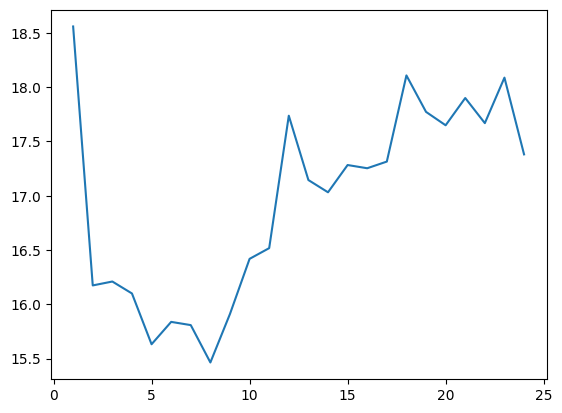

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

mae_errors = []
# accuracies = []
for d in range(1, 25):
  model = DecisionTreeClassifier(max_depth=d, random_state=69)

  model.fit(X_train, y_train)

  y_pred = model.predict(X_test)

  mae = mean_absolute_error(y_test, y_pred)
  mae_errors.append(mae)

  # accuracy = accuracy_score(y_test, y_pred)
  # accuracies.append(accuracy)

print(min(mae_errors))
plt.plot(range(1, 25), mae_errors)
plt.show()
# plt.plot(range(1, 25), accuracies)
# plt.show()

# mse_errors = []
# for d in range(1, 25):
  # model = DecisionTreeClassifier(max_depth=d, random_state=69)

  # model.fit(X_train, y_train)

  # y_pred = model.predict(X_test)

  # mse = mean_squared_error(y_test, y_pred)
  # mse_errors.append(mse)

# print(min(mse_errors))
# plt.plot(range(1, 25), mse_errors)
# plt.show()

### K-Nearest Neighbors

16.677009873060648


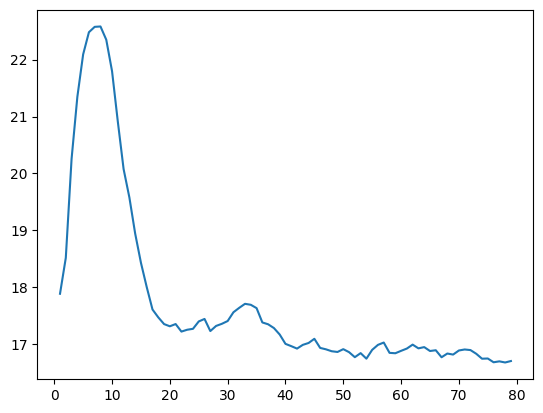

In [105]:
from sklearn.neighbors import KNeighborsClassifier

mae_errors = []
for k in range(1, 80):
  knn = KNeighborsClassifier(n_neighbors=k)

  knn.fit(X_train, y_train)

  y_pred = knn.predict(X_test)


  mae = mean_absolute_error(y_test, y_pred)
  # mse = mean_squared_error(y_test, y_pred)
  # r2 = r2_score(y_test, y_pred)

  mae_errors.append(mae)

print(min(mae_errors))
plt.plot(range(1, 80), mae_errors)
plt.show()

### Distance Weighted KNN

16.585331452750353


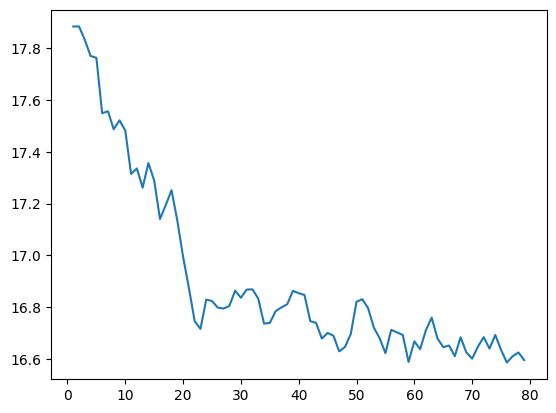

In [106]:
from sklearn.neighbors import KNeighborsClassifier

mae_errors = []
for k in range(1, 80):
  dwknn = KNeighborsClassifier(n_neighbors=k, weights='distance')

  dwknn.fit(X_train, y_train)

  y_pred = dwknn.predict(X_test)

  mae = mean_absolute_error(y_test, y_pred)
  # mse = mean_squared_error(y_test, y_pred)
  # r2 = r2_score(y_test, y_pred)

  mae_errors.append(mae)

print(min(mae_errors))
plt.plot(range(1, 80), mae_errors)
plt.show()

### Locally Weighted Linear Regression

In [107]:
from sklearn.neighbors import NearestNeighbors
import warnings
warnings.filterwarnings("ignore", message="X does not have valid feature names")

class LocallyWeightedLinearRegression:
    def __init__(self, k=10):
        self.k = k
        self.model = LinearRegression()
    
    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train
        self.neighbor_model = NearestNeighbors(n_neighbors=self.k).fit(self.X_train)
    
    def predict(self, X_test):
        predictions = []
        for _, row in X_test.iterrows():
            _, indices = self.neighbor_model.kneighbors([row])
            indices = indices.flatten()

            nearest_X = X_train.iloc[[i for i in indices]]
            nearest_Y = y_train.iloc[[i for i in indices]]
            
            lr = LinearRegression()
            lr.fit(nearest_X, nearest_Y)
            pred = lr.predict([row])

            predictions.append(pred)
        
        return np.array(predictions)

In [108]:
mae_errors = []
for k in [300, 500, 700]:
  lwlr = LocallyWeightedLinearRegression(k=k)
  lwlr.fit(X_train, y_train)
  y_pred = lwlr.predict(X_test)

  mae = mean_absolute_error(y_test, y_pred)
  mae_errors.append(mae)

print(min(mae_errors))

13.209690122581199


Linear Regression has MAEs around 13-14

Logistic Regression has MAEs around 15

Decision Trees have MAEs around 14-15

KNN has MAEs around 16-17

Distance Weighted KNN has MAEs around 16-17

Locally Weighted Linear Regression performs around 12-14


Overall Linear Regression seems like the best model. Although Locally Weighted Linear Regression tends to do slightly better, it is also not an actual class supported by Scikit since we had to make our own.

# Try Custom Data

In [123]:
lr = LinearRegression()
lr.fit(X, y)

dt = DecisionTreeClassifier(max_depth=7, random_state=69)
dt.fit(X, y)


knn = KNeighborsClassifier(n_neighbors=30)
knn.fit(X, y)

lwlr = LocallyWeightedLinearRegression(k=500)
lwlr.fit(X, y)

In [146]:
custom_data = []

custom_data.append({
  'name': 'A Minecraft Movie',
  'directors': ['Jared Hess'],
  'actors': ['Jack Black',
             'Emma Myers', 
             'Jemaine Clement',
             'Jason Momoa',
             'Jennifer Coolidge'
             'Kate McKinnon',
             'Danielle Brooks',
             'Sebastian Hansen'
            ],
  'production_company': 'Warner Bros. Pictures', # production company is actually the distributor
  'genres': ['Kids & Family', 'Action & Adventure', 'Science Fiction & Fantasy'],
  'content_rating': 'PG', # not final but likely
})

custom_data.append({
  'name': 'Mufasa: The Lion King',
  'directors': ['Barry Jenkins (III)'],
  'actors': [
    'Aaron Pierre',
    'Kelvin Harrison Jr.',
    'Tiffany Boone',
    'Kagiso Lediga',
    'Preston Nyman',
    'Mads Mikkelsen',
    'Thandiwe Newton',
    'Lennie James',
    'Anika Noni Rose',
    'Keith David',
    'John Kani',
    'Seth Rogen',
    'Billy Eichner',
    'Donald Glover',
    'Blue Ivy Carter',
    'Beyonc\u00e9 Knowles'
  ],
  'production_company': 'Walt Disney Pictures',
  'genres': ['Kids & Family', 'Action & Adventure', 'Drama', 'Animation'],
  'content_rating': 'PG',
  'runtime': 120
})

custom_data.append({
  'name': 'Captain America: Brave New World',
  'directors': ['Julius Onah'],
  'actors': [
    'Anthony Mackie',
    'Harrison Ford',
    'Tim Blake Nelson',
    'Danny Ramirez',
    'Giancarlo Esposito',
    'Liv Tyler',
    'Shira Haas'
  ],
  # 'production_company': 'Disney/Marvel',
  'production_company': 'Marvel Studios',
  'genres': ['Action & Adventure', 'Science Fiction & Fantasy'],
  'content_rating': 'PG-13',
})

custom_data.append({
  'name': 'Flight Risk',
  'directors': ['Mel Gibson'],
  'actors': [
    'Mark Wahlberg',
    'Michelle Dockery',
    'Topher Grace'
  ],
  # 'production_company': 'Icon Entertainment',
  'production_company': 'Davis Entertainment',
  'genres': ['Mystery & Suspense', 'Action & Adventure', 'Drama'],
  'content_rating': 'R',
  'runtime': 91
})

In [147]:
from encode_custom_data import encode_custom_data

for data in custom_data:
  new_data = encode_custom_data(data)

  new_pred1 = lr.predict(new_data)
  new_pred2 = dt.predict(new_data)
  new_pred3 = knn.predict(new_data)
  
  print(f""""{data['name']}" will have an audience rating of...""")
  print(f"\tLR: {new_pred1[0]}")
  print(f"\tDT: {new_pred2[0]}")
  print(f"\tKNN: {new_pred3[0]}")
  print()

"A Minecraft Movie" will have an audience rating of...
	LR: 58.171875
	DT: 49.0
	KNN: 51.0

"Mufasa: The Lion King" will have an audience rating of...
	LR: 78.171875
	DT: 85.0
	KNN: 72.0

"Captain America: Brave New World" will have an audience rating of...
	LR: 51.90625
	DT: 49.0
	KNN: 49.0

"Flight Risk" will have an audience rating of...
	LR: 54.6953125
	DT: 59.0
	KNN: 38.0

